# Time Series Components: Trend, Seasonality, and Noise

## Learning Objectives
By the end of this notebook, you will be able to:
1. Identify the three main components of time series data
2. Understand what trend, seasonality, and noise mean in plain language
3. Recognize these components in real-world data
4. Distinguish between additive and multiplicative patterns
5. Visually identify components before using decomposition tools


## Introduction: Why Components Matter

Imagine you're analyzing monthly sales data for a retail store. The numbers go up and down, but why? Is it because:
- The business is growing over time? (That's a **trend**)
- Sales always spike in December? (That's **seasonality**)
- Random events like a big customer order? (That's **noise**)

**Understanding these components is the foundation of time series forecasting.**

Most time series can be broken down into three main parts:
1. **Trend** - The long-term direction
2. **Seasonality** - Repeating patterns
3. **Noise** - Random variation

Once we understand these components, we can:
- Choose the right forecasting model
- Make better predictions
- Understand what's driving our data

**Think About It:** Can you think of a time series in your work where you could identify a trend, seasonality, or noise?


## Section 1: The Trend Component

### What is a Trend?

A **trend** is the long-term direction of your data. It tells you whether things are generally going up, down, or staying flat over time.

**Think of it like this:** If you zoom out and look at the big picture, what direction is the data moving?

### Types of Trends

1. **Upward Trend (Growth)**
   - Sales increasing year over year
   - Company revenue growing
   - Population increasing
   - **Example:** A startup's user base growing from 100 to 10,000 over 3 years

2. **Downward Trend (Decline)**
   - Product sales decreasing as it becomes obsolete
   - Customer churn increasing
   - Market share shrinking
   - **Example:** DVD sales declining as streaming becomes popular

3. **Flat Trend (Stable)**
   - Consistent performance with no major change
   - Stable customer base
   - Steady production output
   - **Example:** A mature product maintaining steady sales

### Real-World Trend Examples

**Business:**
- Company revenue growing 10% each year (upward trend)
- A product's sales declining after a competitor enters the market (downward trend)
- A subscription service maintaining 1,000 customers consistently (flat trend)

**Healthcare:**
- Patient volume increasing as population grows (upward trend)
- Disease cases decreasing due to vaccination (downward trend)

**Technology:**
- Website traffic growing month over month (upward trend)
- Legacy system usage declining as users migrate (downward trend)

**Key Insight:** Trends show the "big picture" direction, smoothing out short-term bumps and fluctuations.


## Section 2: The Seasonality Component

### What is Seasonality?

**Seasonality** refers to repeating patterns that occur at regular intervals. The word "season" might make you think of summer and winter, but seasonality can happen daily, weekly, monthly, or yearly.

**Think of it like this:** Are there certain times when the pattern repeats? Like higher sales every December, or more website traffic on weekdays?

### Types of Seasonality

1. **Yearly Seasonality**
   - Ice cream sales peak every summer
   - Retail sales spike every December (holidays)
   - Heating costs higher in winter
   - **Example:** A ski resort sees peak visitors every winter

2. **Monthly Seasonality**
   - Payroll expenses spike at month-end
   - Subscription renewals at the beginning of each month
   - **Example:** Utility bills higher in certain months

3. **Weekly Seasonality**
   - Restaurant traffic higher on weekends
   - Office building energy usage lower on weekends
   - **Example:** E-commerce sales higher on weekends

4. **Daily Seasonality**
   - Website traffic peaks at lunchtime
   - Call center volume higher during business hours
   - Energy usage peaks in the evening
   - **Example:** Coffee shop sales highest in the morning

### Real-World Seasonality Examples

**Retail:**
- Holiday shopping spikes (yearly - December)
- Weekend shopping patterns (weekly - Saturday/Sunday)
- Morning rush for coffee (daily - 7-9 AM)

**Healthcare:**
- Flu season peaks (yearly - winter months)
- ER visits higher on weekends (weekly)
- Appointment bookings higher in mornings (daily)

**Technology:**
- Server load higher during business hours (daily)
- Website traffic lower on weekends (weekly)
- Cloud usage spikes at month-end (monthly)

**Key Insight:** Seasonality creates predictable patterns. If you know it's December, you can expect higher sales. If you know it's Monday morning, you can expect higher call volume.


## Section 3: The Noise Component

### What is Noise?

**Noise** (also called "irregular" or "residual") is the random, unpredictable variation in your data that you can't explain with trends or seasonality.

**Think of it like this:** Even if you account for the trend and seasonality, there's still some randomness left over. That's noise.

### Characteristics of Noise

1. **Unpredictable:** You can't forecast it
2. **Random:** No clear pattern
3. **Unavoidable:** Present in all real-world data
4. **Small (usually):** Should be smaller than trend and seasonality

### Real-World Noise Examples

**Business:**
- A single customer making an unusually large purchase
- Unexpected competitor promotion affecting sales
- News story temporarily boosting website traffic
- **Example:** A viral social media post causes a sudden spike in website visits

**Healthcare:**
- Unusual weather causing more ER visits
- One-time event affecting patient volume
- **Example:** A local festival causing more injuries than usual

**Technology:**
- Server outage causing traffic drop
- Viral content causing traffic spike
- **Example:** A news article linking to your website causes unexpected traffic

**Key Insight:** Noise is what makes forecasting imperfect. We can predict trends and seasonality, but we can't predict random events. Good models minimize noise, but can't eliminate it completely.


## Section 4: Visualizing Components in Real Data

Let's load our airline passenger data and see if we can identify these components visually.


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully")


Libraries imported successfully


In [7]:
# Load and prepare the data
data = pd.read_csv('AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

print("✅ Data loaded successfully")
print(f"Date range: {data.index.min()} to {data.index.max()}")
print(f"Total months: {len(data)}")


✅ Data loaded successfully
Date range: 1949-01-01 00:00:00 to 1960-12-01 00:00:00
Total months: 144


### Identifying Components Visually

Let's plot the data and see if we can identify the trend, seasonality, and noise:


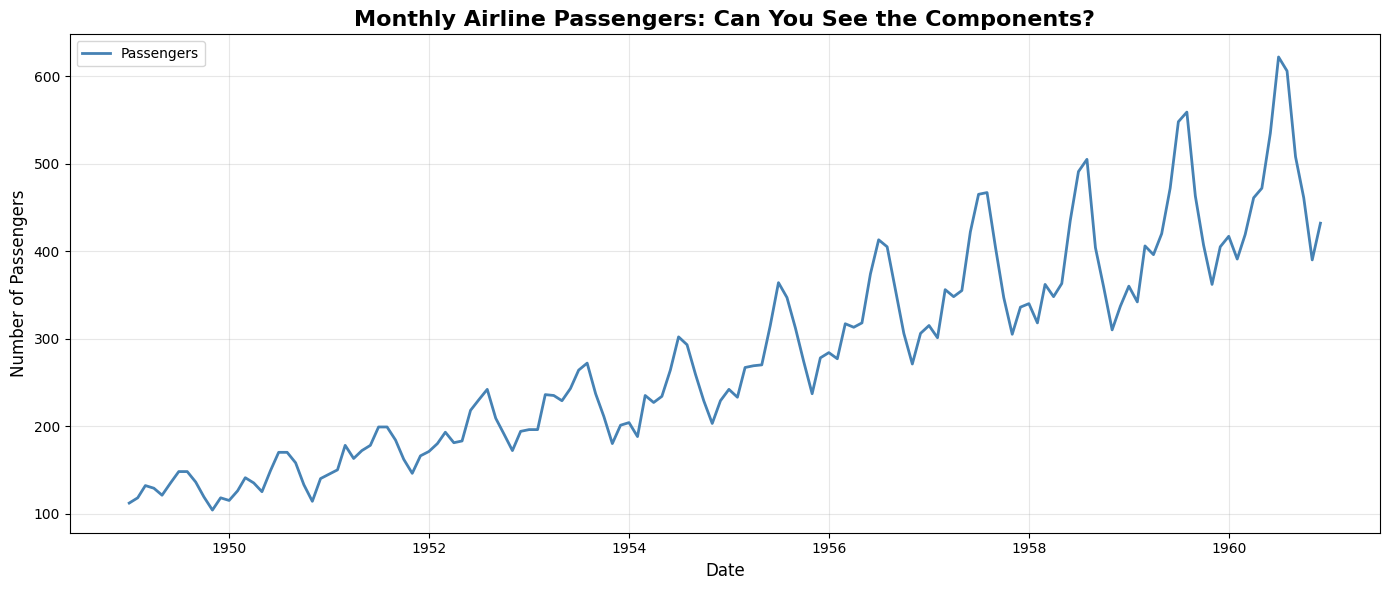


🔍 Visual Analysis Questions:
1. TREND: Is the overall direction going up, down, or staying flat?
2. SEASONALITY: Do you see repeating patterns? (Look for peaks and valleys)
3. NOISE: Are there small random fluctuations around the main pattern?


In [8]:
# Plot the full time series
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['#Passengers'], linewidth=2, color='steelblue', label='Passengers')
plt.title('Monthly Airline Passengers: Can You See the Components?', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print("\n🔍 Visual Analysis Questions:")
print("1. TREND: Is the overall direction going up, down, or staying flat?")
print("2. SEASONALITY: Do you see repeating patterns? (Look for peaks and valleys)")
print("3. NOISE: Are there small random fluctuations around the main pattern?")


### What We Can See

Looking at the plot, we can identify:

1. **TREND (Upward):** The overall line is clearly going up over time. The airline is growing.

2. **SEASONALITY (Yearly):** We can see peaks and valleys that repeat. The peaks appear to be in the summer months (higher passenger counts), and valleys in winter months.

3. **NOISE:** There are small fluctuations around the main pattern - not every summer peak is exactly the same height, and not every winter valley is exactly the same depth.

**Business Insight:** This airline has a growing business (trend) with predictable seasonal patterns (higher in summer, lower in winter), plus some random variation (noise) that we can't predict.

Let's look at the data more closely to confirm our observations:


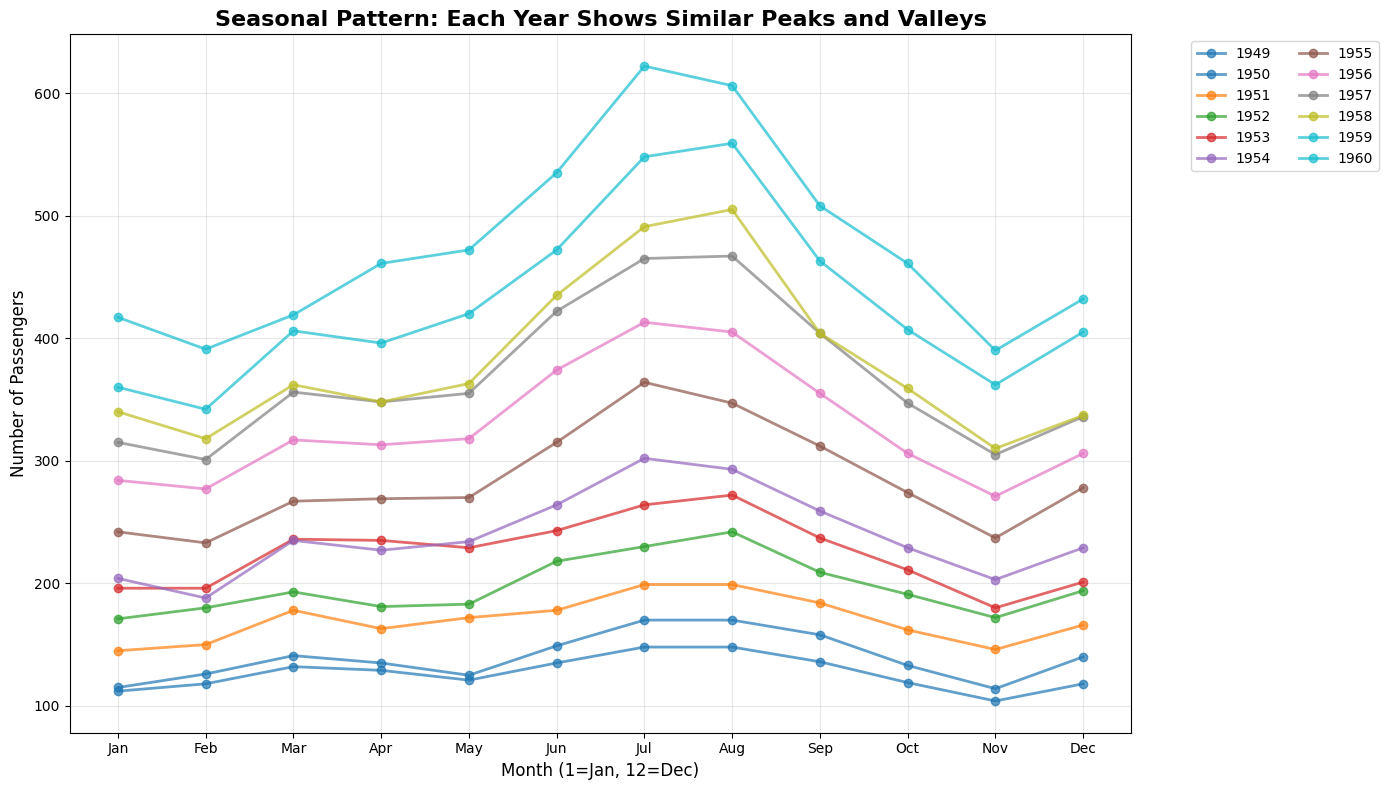


📊 Key Observations:
- Notice how each year follows a similar pattern (SEASONALITY)
- But each year is higher than the previous (TREND - upward growth)
- The patterns aren't identical (NOISE - random variation)
- Peaks appear to be in summer months (June-August)
- Valleys appear to be in winter months (November-February)


In [9]:
# Let's look at the data by year to see the seasonal pattern more clearly
# We'll plot each year as a separate line to see the repeating pattern

# Extract year and month for grouping
data['Year'] = data.index.year
data['MonthNum'] = data.index.month

# Create a plot showing each year as a separate line
plt.figure(figsize=(14, 8))

# Plot each year
years = sorted(data['Year'].unique())
colors = plt.cm.tab10(np.linspace(0, 1, len(years)))

for i, year in enumerate(years):
    year_data = data[data['Year'] == year]
    plt.plot(year_data['MonthNum'], year_data['#Passengers'], 
             marker='o', linewidth=2, label=f'{year}', color=colors[i], alpha=0.7)

plt.title('Seasonal Pattern: Each Year Shows Similar Peaks and Valleys', fontsize=16, fontweight='bold')
plt.xlabel('Month (1=Jan, 12=Dec)', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

print("\n📊 Key Observations:")
print("- Notice how each year follows a similar pattern (SEASONALITY)")
print("- But each year is higher than the previous (TREND - upward growth)")
print("- The patterns aren't identical (NOISE - random variation)")
print("- Peaks appear to be in summer months (June-August)")
print("- Valleys appear to be in winter months (November-February)")


## Section 5: Additive vs Multiplicative Patterns

When we combine trend, seasonality, and noise, they can interact in two different ways:

### Additive Pattern

In an **additive** pattern, the components are added together:
- **Time Series = Trend + Seasonality + Noise**

**Characteristics:**
- The size of seasonal fluctuations stays roughly the same over time
- If the trend goes up by 100, seasonality adds/subtracts a consistent amount
- **Example:** Sales are always $1,000 higher in December, regardless of whether total sales are $10,000 or $100,000

**Visual:** The peaks and valleys stay about the same height as the trend grows

### Multiplicative Pattern

In a **multiplicative** pattern, the components multiply together:
- **Time Series = Trend × Seasonality × Noise**

**Characteristics:**
- The size of seasonal fluctuations grows with the trend
- If sales double, the seasonal spike also doubles
- **Example:** December sales are always 20% higher, so if total sales grow from $10,000 to $20,000, the December spike grows from $2,000 to $4,000

**Visual:** The peaks and valleys get bigger as the trend grows

### Which Pattern Do We Have?

Let's check our airline passenger data:


Analyzing Seasonal Fluctuation Size:
Early period (1949-1952) range: 138 passengers
Later period (1958-1960) range: 312 passengers

The range increased by 126%

✅ MULTIPLICATIVE PATTERN detected
   The seasonal fluctuations are getting larger over time.
   This means the pattern multiplies as the trend grows.


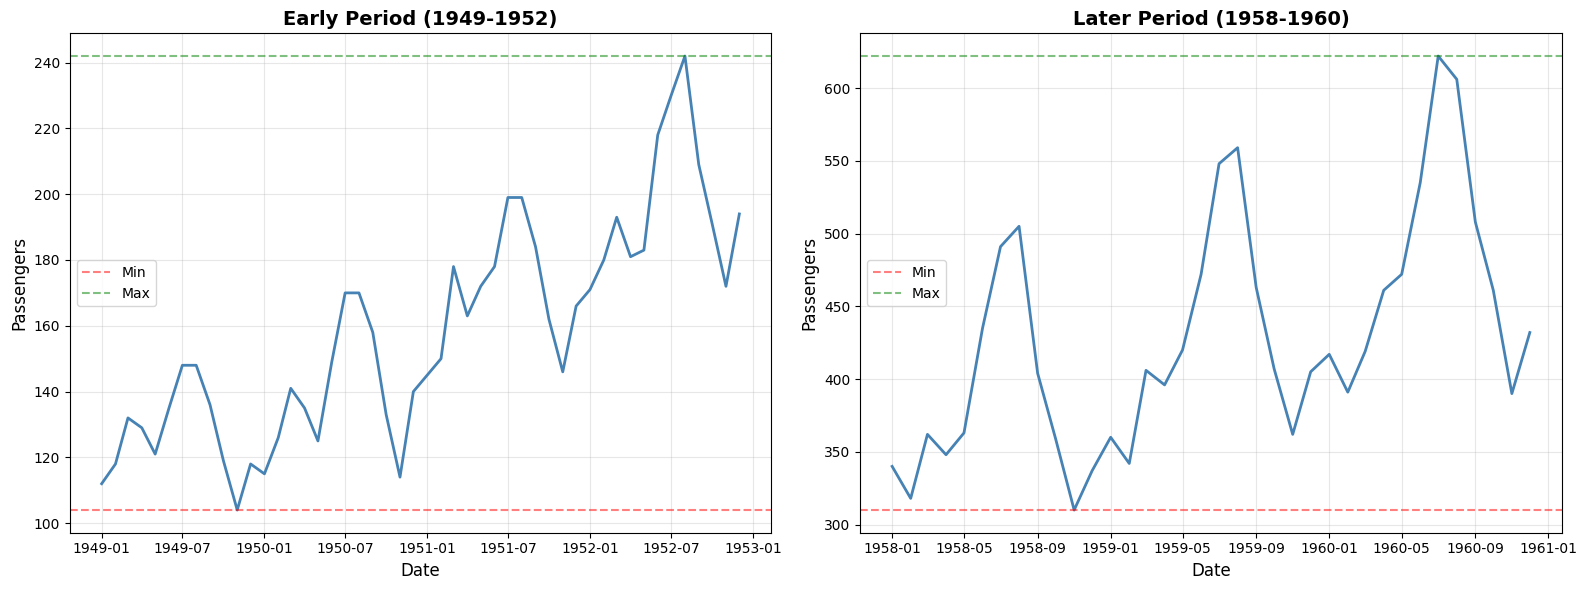


💡 Notice how the peaks and valleys are much larger in the later period
   This confirms we have a MULTIPLICATIVE pattern


In [10]:
# Let's compare early years vs later years to see if seasonal fluctuations are growing
early_years = data[data['Year'] <= 1952]
later_years = data[data['Year'] >= 1958]

# Calculate the range (max - min) for early and later periods
early_range = early_years['#Passengers'].max() - early_years['#Passengers'].min()
later_range = later_years['#Passengers'].max() - later_years['#Passengers'].min()

print("Analyzing Seasonal Fluctuation Size:")
print("=" * 50)
print(f"Early period (1949-1952) range: {early_range:.0f} passengers")
print(f"Later period (1958-1960) range: {later_range:.0f} passengers")
print(f"\nThe range increased by {((later_range / early_range) - 1) * 100:.0f}%")

if later_range > early_range * 1.2:
    print("\n✅ MULTIPLICATIVE PATTERN detected")
    print("   The seasonal fluctuations are getting larger over time.")
    print("   This means the pattern multiplies as the trend grows.")
else:
    print("\n✅ ADDITIVE PATTERN detected")
    print("   The seasonal fluctuations stay roughly the same size.")
    print("   This means the pattern adds a consistent amount.")

# Visual comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Early years
ax1.plot(early_years.index, early_years['#Passengers'], linewidth=2, color='steelblue')
ax1.set_title('Early Period (1949-1952)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Passengers', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=early_years['#Passengers'].min(), color='red', linestyle='--', alpha=0.5, label='Min')
ax1.axhline(y=early_years['#Passengers'].max(), color='green', linestyle='--', alpha=0.5, label='Max')
ax1.legend()

# Later years
ax2.plot(later_years.index, later_years['#Passengers'], linewidth=2, color='steelblue')
ax2.set_title('Later Period (1958-1960)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Passengers', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.axhline(y=later_years['#Passengers'].min(), color='red', linestyle='--', alpha=0.5, label='Min')
ax2.axhline(y=later_years['#Passengers'].max(), color='green', linestyle='--', alpha=0.5, label='Max')
ax2.legend()

plt.tight_layout()
plt.show()

print("\n💡 Notice how the peaks and valleys are much larger in the later period")
print("   This confirms we have a MULTIPLICATIVE pattern")


## Section 6: Practical Tips for Identifying Components

### How to Identify Components Visually

**1. Identifying Trend:**
- Zoom out and look at the overall direction
- Draw an imaginary line through the middle of the data
- Ask: "Is this generally going up, down, or staying flat?"

**2. Identifying Seasonality:**
- Look for repeating patterns
- Check if peaks/valleys occur at regular intervals
- Compare similar time periods (e.g., all Decembers, all Mondays)
- Ask: "Do I see the same pattern repeating?"

**3. Identifying Noise:**
- Look at the small fluctuations around the main pattern
- These should be relatively small compared to trend and seasonality
- Ask: "After accounting for trend and seasonality, what's left?"

### Common Mistakes to Avoid

1. **Confusing Trend with Seasonality:**
   - Trend = long-term direction (years)
   - Seasonality = repeating pattern (days/weeks/months)

2. **Over-interpreting Noise:**
   - Small fluctuations are normal
   - Don't try to model every tiny variation

3. **Missing Multiplicative Patterns:**
   - If seasonal spikes are growing, it's multiplicative
   - If they stay the same size, it's additive

**Think About It:** Can you think of a time series where the seasonal pattern might be multiplicative? (Hint: Think about percentages rather than fixed amounts)


## Summary: Key Takeaways

This notebook introduced you to the three main components of time series data:

### What We Learned

1. **Trend Component:**
   - Long-term direction (upward, downward, or flat)
   - Shows the "big picture" movement
   - Examples: Growing revenue, declining product sales

2. **Seasonality Component:**
   - Repeating patterns at regular intervals
   - Can be daily, weekly, monthly, or yearly
   - Examples: Holiday sales spikes, weekend traffic patterns

3. **Noise Component:**
   - Random, unpredictable variation
   - Can't be forecasted
   - Examples: Unexpected events, random fluctuations

4. **Additive vs Multiplicative:**
   - Additive: Seasonal fluctuations stay the same size
   - Multiplicative: Seasonal fluctuations grow with the trend
   - Our airline data shows a multiplicative pattern

### Key Insights

- **Visual identification first:** Always look at plots to identify components before using tools
- **Components work together:** Real data combines all three components
- **Pattern type matters:** Additive vs multiplicative affects which models to use
- **Noise is normal:** Some randomness is expected and can't be eliminated

### Why This Matters

Understanding these components helps us:
- Choose the right forecasting model
- Interpret our data correctly
- Make better business decisions
- Set realistic expectations for forecast accuracy

### Next Steps

In the next notebook, we'll learn how to use Python tools to automatically decompose time series data into these components. This will help us see each component separately and understand our data even better!

**Remember:** Good forecasting starts with understanding what's driving your data. Always identify the components first.
